# Demo: Nonloc heatflux

This notebook provide a demo case on the application of the heat conduction solver.
<br>

## Geometry & Computational Grid
In this case, we will consider a 1d plasma with temperature, electron density, ionization rate and Knudsen number profiles, provided by kinetic simulation with length $L  = 0.19$ cm.  We will use $N=400$ nodes for this profile. As you can see, the grid spacing, $dx$ will be $L/(N-1)=476$ $\mu \mathrm{m}$.

First, import parameter module in order to get a Pandas series containing all the parameters.
Last two rows contain a NN training part. The `io.capture_output` function is used to avoid the overfilling of output (to many messages are displayed and VS Code can't manage that)

In case coefficients $\alpha$ and $\beta$ are defined without using the NN, use `model = None`

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import os
import parameter as param
from pathlib import Path
import heatConduction as hc
importlib.reload(hc)
importlib.reload(param)   #In order to apply changes in the module 
%matplotlib widget


All parameters of the problem, such as number of used profiles points, boundary conditions, definition of parameters $\alpha$ and $\beta$, number of timesteps and its magnitude $dt$ are contained and may be modified in `parameter.py` file. \
`importlib` module and `reload` function in particullar are used to update modules if modified \
`heatConduction.py` package contains necessary components to solve the PDEs.
It also creates a `matplotlib` figure, which will display heatflux calculated using neural network, (if) trained in first cell. \
Next cell initiates solution of the problem. The result temperature profiles, last cache and coefficients are contained in these four variables accordingly


### Local transport $\alpha=1$, $\beta = 5/2$

In [40]:
path = Path(os.getcwd())
para = param.main(path)


results, cache, heatflux = hc.solve(para)

Heat Conduction Solver
 [Step] [Time] [Iter] [Residue] [Newton outcome] [Max beta] [Max alpha] [Minimal T] [Maximal T] [meanEnergy]
[  1 ] [4.38E-03 ] [ 2 ] [0.00E+00 ] [3.98E-07 ] [2.50E+00 ] [1.00E+03 ] [1.40E+03 ] [2.40E+03 ] [3.4649860147264803E+24 ]
[  2 ] [8.77E-03 ] [ 2 ] [0.00E+00 ] [4.03E-07 ] [2.50E+00 ] [1.00E+03 ] [1.40E+03 ] [2.40E+03 ] [3.4649860147264803E+24 ]
[  3 ] [1.31E-02 ] [ 2 ] [0.00E+00 ] [3.99E-07 ] [2.50E+00 ] [1.00E+03 ] [1.40E+03 ] [2.40E+03 ] [3.4649860147264803E+24 ]
[  4 ] [1.75E-02 ] [ 2 ] [0.00E+00 ] [3.95E-07 ] [2.50E+00 ] [1.00E+03 ] [1.40E+03 ] [2.40E+03 ] [3.4649860147264803E+24 ]
[  5 ] [2.19E-02 ] [ 2 ] [0.00E+00 ] [4.00E-07 ] [2.50E+00 ] [1.00E+03 ] [1.40E+03 ] [2.40E+03 ] [3.4649860147264803E+24 ]
[  6 ] [2.63E-02 ] [ 2 ] [1.55E-16 ] [3.96E-07 ] [2.50E+00 ] [1.00E+03 ] [1.40E+03 ] [2.40E+03 ] [3.4649860147264808E+24 ]
[  7 ] [3.07E-02 ] [ 2 ] [1.55E-16 ] [4.00E-07 ] [2.50E+00 ] [1.00E+03 ] [1.40E+03 ] [2.40E+03 ] [3.4649860147264803E+24 ]
[  8 ] 

The `results` is a numpy array consist of evolution of each time step over the domain. The `cache` file is a Python dictionary consists of some variables used by debugging. <br>

## Visualization of $\alpha$ and $\beta$

In [41]:
init_profile = pd.read_csv('./initial_profile.csv', index_col=(0))#/DRPzapocet

In [42]:
init_profile

,x,Te,Zbar,ne
0,0.010000,2550.190493,1.999184,4.671632e+20
1,0.010450,2550.145819,1.999184,4.673177e+20
2,0.010900,2550.099574,1.999184,4.674773e+20
3,0.011350,2550.051676,1.999184,4.676414e+20
4,0.011800,2550.002033,1.999184,4.678096e+20
...,...,...,...,...
395,0.187754,274.566988,36.520500,7.926455e+21
396,0.188204,274.339281,36.476352,8.021474e+21
397,0.188654,274.139093,36.437388,8.098941e+21
398,0.189104,273.966183,36.402828,8.159613e+21


In [43]:
# Enables better (IMO) styles for plots in cost of perfomance
if False:
    import scienceplots
    plt.style.use('science')
#

T = pd.DataFrame(results)

heatflux3d = pd.DataFrame(heatflux, columns=T.columns,index=T.index)
endframe = -1  #last timestep that will be visualized. I use it in case hc.solve calculation is corrupted in order to all e

## Visualization of temperature profiles
The first plot is the evolution field in both time and space. We can view the results in a 3D contour plot by just passing the processed T to the function evolutionField(). <br>
It can be seen that the temperature over the var is increasing as time elapses.

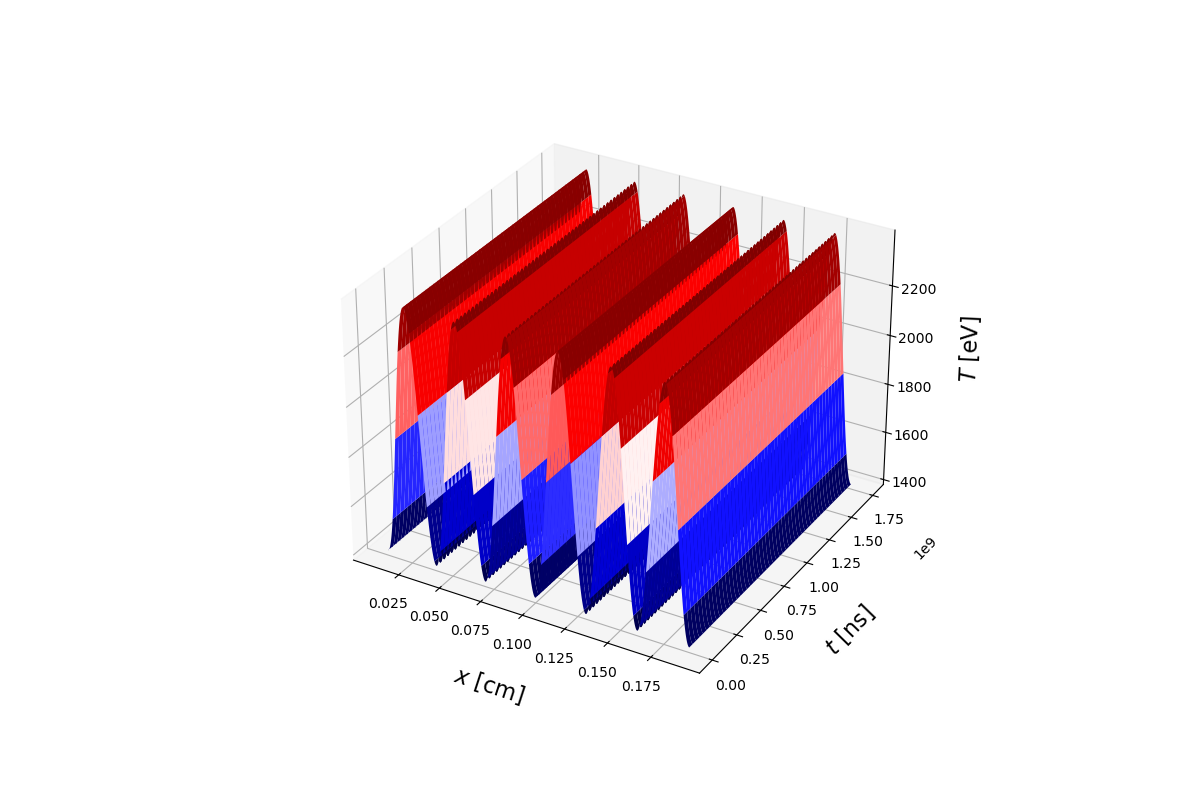

In [44]:
##NONLOCAL
hc.evolutionField(T[T.columns[:endframe]], r'$T$ [eV]')

In [46]:
sum(abs(T[T.columns[1]] - T[T.columns[100]]))

0.02758358555115592

In [36]:
heat_flux = pd.DataFrame(cache['heatflux_prof'], columns=T.columns)

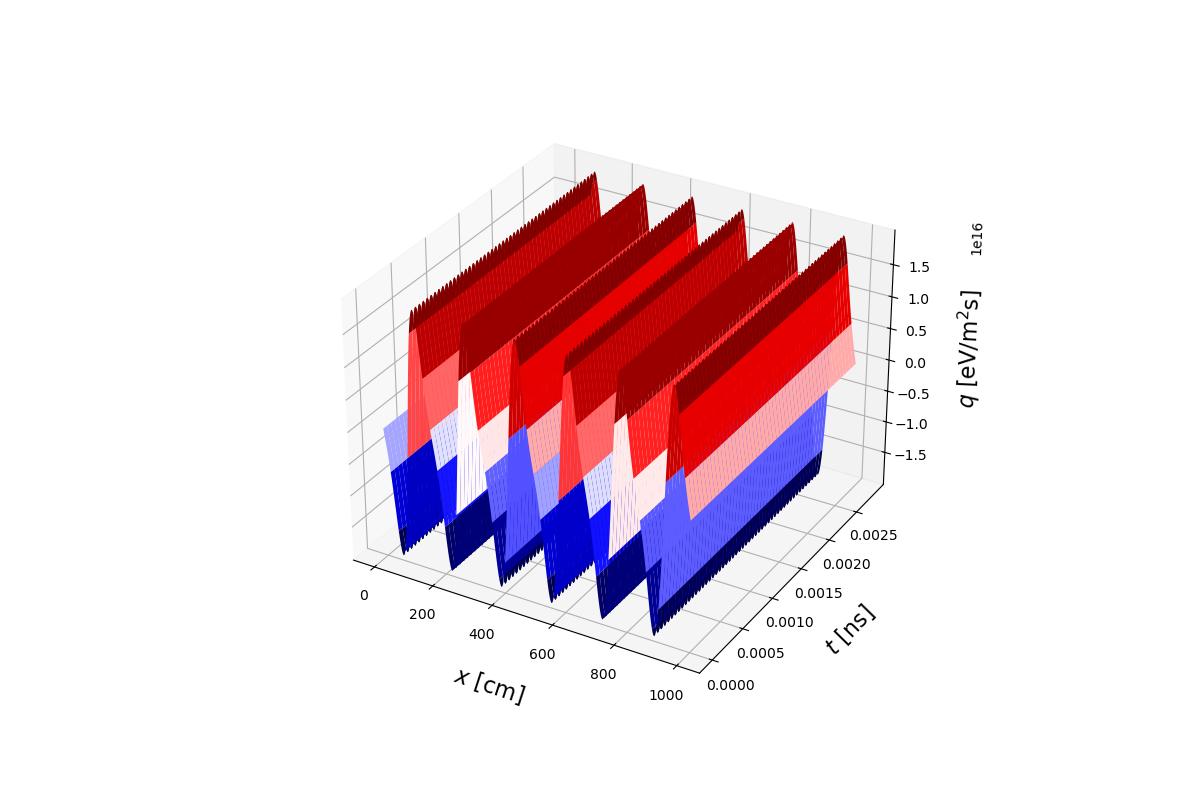

In [38]:
hc.evolutionField(heat_flux[T.columns[:endframe]], r'$q$ [eV/m$^2$s]')